<a href="https://colab.research.google.com/github/anaazzahra/Hotel-Booking_Mini-Project/blob/main/Hotel_booking_Prediction_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#load data set
df_hotel = pd.read_csv("/content/drive/MyDrive/Data Portfolio/Rakamin Academy/Database/hotel_bookings_data.csv")

#checking
df_hotel.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


Data Preprocess

In [ ]:
#check column and data type
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#grouping data set
num = df_hotel.select_dtypes(include="number").columns
cat = df_hotel.select_dtypes(include="object").columns

In [ ]:
#screening cat column
for column in cat:
    display(f"Unique values for column '{column}':")
    display(df_hotel[column].unique())

"Unique values for column 'hotel':"

array(['Resort Hotel', 'City Hotel'], dtype=object)

"Unique values for column 'arrival_date_month':"

array(['September', 'October', 'November', 'December', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August'],
      dtype=object)

"Unique values for column 'meal':"

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

"Unique values for column 'city':"

array(['Kota Denpasar', 'Kabupaten Bangka', 'Kabupaten Sleman',
       'Kota Batu', 'Kota Malang', 'Kota Yogyakarta', nan,
       'Kabupaten Tangerang', 'Kota Semarang', 'Kota Serang',
       'Kota Tangerang', 'Kota Bogor', 'Kabupaten Bandung',
       'Kabupaten Magelang', 'Kabupaten Sumedang', 'Kota Jakarta Timur',
       'Kabupaten Purwakarta', 'Kabupaten Kepulauan Seribu',
       'Kabupaten Belitung', 'Kota Jakarta Pusat', 'Kota Jakarta Selatan',
       'Kota Surabaya', 'Kota Jakarta Utara', 'Kota Gorontalo',
       'Kota Jambi', 'Kota Jakarta Barat', 'Kota Bengkulu',
       'Kabupaten Bandung Barat', 'Kabupaten Bekasi', 'Kabupaten Bogor',
       'Kabupaten Ciamis', 'Kabupaten Cianjur', 'Kabupaten Cirebon',
       'Kota Cimahi', 'Kabupaten Indramayu', 'Kabupaten Karawang',
       'Kabupaten Kuningan', 'Kabupaten Majalengka', 'Kabupaten Serang',
       'Kota Pangkal Pinang', 'Kabupaten Subang', 'Kabupaten Sukabumi',
       'Kabupaten Garut', 'Kabupaten Tasikmalaya', 'Kota Bandung',
 

"Unique values for column 'market_segment':"

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

"Unique values for column 'distribution_channel':"

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

"Unique values for column 'deposit_type':"

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

"Unique values for column 'customer_type':"

array(['Personal', 'Contract', 'Family', 'Bussiness'], dtype=object)

"Unique values for column 'reservation_status':"

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [ ]:
#There were three columns with "Undefined" value, such as: "meal", "market_segment", "distribution_channel"
#replace 'Undefined' value with 'no_meal', 'no_market', 'no_channel': It's mean there is no value in this context, but there was no relevant choices in the list.
df_hotel.replace(
    {
        "meal": {"Undefined": "No Meal"},
        "market_segment": {"Undefined": "no_market"},
        "distribution_channel": {"Undefined": "no_channel"}
    },
    inplace=True
)

In [ ]:
display(f"Unique values for column 'meal':")
display(df_hotel['meal'].unique())

"Unique values for column 'meal':"

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal'], dtype=object)

In [ ]:
#screening for num column
for column in num:
  display(f"Unique values for column '{column}':")
  display(df_hotel[column].unique())

"Unique values for column 'is_canceled':"

array([0, 1])

"Unique values for column 'lead_time':"

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99, 118,  95,  96,  69,
        45,  40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,
        76,   3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81,
       368, 364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,
        86,  52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,
        34,  27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,
        67,  55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,
        22,  91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58,
       116,  42, 321,  38,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

"Unique values for column 'arrival_date_year':"

array([2017, 2018, 2019])

"Unique values for column 'arrival_date_week_number':"

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26])

"Unique values for column 'arrival_date_day_of_month':"

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

"Unique values for column 'stays_in_weekend_nights':"

array([ 0,  1,  2,  4,  3,  6, 13,  8,  5,  7, 12,  9, 16, 18, 19, 10, 14])

"Unique values for column 'stays_in_weekdays_nights':"

array([ 0,  1,  2,  3,  4,  5, 10, 11,  8,  6,  7, 15,  9, 12, 33, 20, 14,
       16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 18, 34, 35,
       41])

"Unique values for column 'adults':"

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

"Unique values for column 'children':"

array([ 0.,  1.,  2., 10.,  3., nan])

"Unique values for column 'babies':"

array([ 0,  1,  2, 10,  9])

"Unique values for column 'is_repeated_guest':"

array([0, 1])

"Unique values for column 'previous_cancellations':"

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11])

"Unique values for column 'previous_bookings_not_canceled':"

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

"Unique values for column 'booking_changes':"

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18])

"Unique values for column 'agent':"

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

"Unique values for column 'company':"

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

"Unique values for column 'days_in_waiting_list':"

array([  0,  50,  47,  65, 122,  75, 101, 150, 125,  14,  60,  34, 100,
        22, 121,  61,  39,   5,   1,   8, 107,  43,  52,   2,  11, 142,
       116,  13,  44,  97,  83,   4, 113,  18,  20, 185,  93, 109,   6,
        37, 105, 154,  64,  99,  38,  48,  33,  77,  21,  80,  59,  40,
        58,  89,  53,  49,  69,  87,  91,  57, 111,  79,  98,  85,  63,
        15,   3,  41, 224,  31,  56, 187, 176,  71,  55,  96, 236, 259,
       207, 215, 160, 120,  30,  32,  27,  62,  24, 108, 147, 379,  70,
        35, 178, 330, 223, 174, 162, 391,  68, 193,  10,  76,  16,  28,
         9, 165,  17,  25,  46,   7,  84, 175, 183,  23, 117,  12,  54,
        26,  73,  45,  19,  42,  72,  81,  92,  74, 167,  36])

"Unique values for column 'adr':"

array([  0.  ,  75.  ,  98.  , ..., 266.75, 209.25, 157.71])

"Unique values for column 'required_car_parking_spaces':"

array([0, 1, 2, 8, 3])

"Unique values for column 'total_of_special_requests':"

array([0, 1, 3, 2, 4, 5])

In [ ]:
#checking missing value
df_hotel.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_weekdays_nights,0
adults,0


In [ ]:
#handling missing value
#drop city "nan"
df_hotel.dropna(subset=["city"], inplace=True)
df_hotel.dropna(subset=["children"], inplace=True)

#replace with 0 column "agent" and "company"
df_hotel["agent"].fillna(0, inplace=True)
df_hotel["company"].fillna(0, inplace=True)

df_hotel.isnull().sum()

/tmp/ipython-input-4073667898.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_hotel["agent"].fillna(0, inplace=True)
/tmp/ipython-input-4073667898.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_weekdays_nights,0
adults,0


In [ ]:
#checking duplicated data
df_hotel.duplicated().sum()

np.int64(33223)

In [ ]:
df_hotel[df_hotel.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,0.0,0,Personal,98.00,0,1,Check-Out
22,Resort Hotel,0,72,2017,September,27,1,2,4,2,...,1,No Deposit,250.0,0.0,0,Personal,84.67,0,1,Check-Out
43,Resort Hotel,0,70,2017,September,27,2,2,3,2,...,0,No Deposit,250.0,0.0,0,Personal,137.00,0,1,Check-Out
138,Resort Hotel,1,5,2017,September,28,5,1,0,2,...,0,No Deposit,240.0,0.0,0,Personal,97.00,0,0,Canceled
200,Resort Hotel,0,0,2017,September,28,7,0,1,1,...,0,No Deposit,240.0,0.0,0,Personal,109.80,0,3,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2019,October,35,31,0,3,2,...,0,No Deposit,9.0,0.0,0,Personal,126.00,0,2,Check-Out
119352,City Hotel,0,63,2019,October,35,31,0,3,3,...,0,No Deposit,9.0,0.0,0,Family,195.33,0,2,Check-Out
119353,City Hotel,0,63,2019,October,35,31,0,3,3,...,0,No Deposit,9.0,0.0,0,Family,195.33,0,2,Check-Out
119354,City Hotel,0,63,2019,October,35,31,0,3,3,...,0,No Deposit,9.0,0.0,0,Family,195.33,0,2,Check-Out


In [ ]:
#handling duplicated: remove duplicated
df_hotel.drop_duplicates(inplace=True)
df_hotel.duplicated().sum()

np.int64(0)

In [ ]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85675 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85675 non-null  object 
 1   is_canceled                     85675 non-null  int64  
 2   lead_time                       85675 non-null  int64  
 3   arrival_date_year               85675 non-null  int64  
 4   arrival_date_month              85675 non-null  object 
 5   arrival_date_week_number        85675 non-null  int64  
 6   arrival_date_day_of_month       85675 non-null  int64  
 7   stays_in_weekend_nights         85675 non-null  int64  
 8   stays_in_weekdays_nights        85675 non-null  int64  
 9   adults                          85675 non-null  int64  
 10  children                        85675 non-null  float64
 11  babies                          85675 non-null  int64  
 12  meal                            8567

In [ ]:
df_hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,85675.000000,85675.000000,85675.000000,85675.00000,85675.000000,85675.000000,85675.000000,85675.000000,85675.000000,85675.000000,85675.000000,85675.000000,85675.000000,85675.000000,85675.000000,85675.000000,85675.000000,85675.00000,85675.000000,85675.000000
mean,0.276615,79.553382,2018.217018,26.79965,15.808952,1.011964,2.636708,1.881331,0.140870,0.010995,0.039662,0.030394,0.179189,0.272238,81.310802,10.519568,0.648532,106.87535,0.084447,0.705982
std,0.447327,85.550228,0.683854,13.65472,8.839799,1.030199,2.048373,0.626903,0.459266,0.114420,0.195164,0.371921,1.730349,0.730389,109.962758,52.910119,9.307143,55.11784,0.281936,0.833416
min,0.000000,0.000000,2017.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.38000,0.000000,0.000000
25%,0.000000,11.000000,2018.000000,16.00000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.42000,0.000000,0.000000
50%,0.000000,49.000000,2018.000000,27.00000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,99.00000,0.000000,1.000000
75%,1.000000,124.000000,2019.000000,37.00000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,0.000000,135.00000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.00000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.00000,8.000000,5.000000


In [ ]:
#add column total guest from adult + children + babies
df_hotel["total_guest"] = df_hotel["adults"] + df_hotel["children"] + df_hotel["babies"]

#add column total_stay from 'stays_in_weekend_nights' and 'stays_in_weekdays_nights'
df_hotel["total_stay"] = df_hotel["stays_in_weekend_nights"] + df_hotel["stays_in_weekdays_nights"]

In [ ]:
#add colum date time from arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month
df_hotel['date'] = pd.to_datetime(df_hotel['arrival_date_year'].astype(str) + '-' + df_hotel['arrival_date_month'].astype(str) + '-' + df_hotel['arrival_date_day_of_month'].astype(str), format='%Y-%B-%d', errors='coerce')

In [ ]:
print("1. Overall Cancellation Percentage:")
cancellation_percentage = (df_hotel['is_canceled'].sum() / len(df_hotel)) * 100
print(f"{cancellation_percentage:.2f}%")

print("\n2. Total Bookings per Year:")
total_bookings_per_year = df_hotel.groupby('arrival_date_year').size().reset_index(name='total_bookings')
print(total_bookings_per_year)

print("\n3. Cancellation Percentage per Year:")
cancellations_per_year = df_hotel.groupby('arrival_date_year')['is_canceled'].sum().reset_index(name='canceled_bookings')
total_bookings_per_year = df_hotel.groupby('arrival_date_year').size().reset_index(name='total_bookings')

cancellation_per_year_df = pd.merge(total_bookings_per_year, cancellations_per_year, on='arrival_date_year')
cancellation_per_year_df['cancellation_percentage'] = (cancellation_per_year_df['canceled_bookings'] / cancellation_per_year_df['total_bookings']) * 100
print(cancellation_per_year_df)

1. Overall Cancellation Percentage:
27.66%

2. Total Bookings per Year:
   arrival_date_year  total_bookings
0               2017           12754
1               2018           41574
2               2019           31347

3. Cancellation Percentage per Year:
   arrival_date_year  total_bookings  canceled_bookings  \
0               2017           12754               2630   
1               2018           41574              11047   
2               2019           31347              10022   

   cancellation_percentage  
0                20.620982  
1                26.571896  
2                31.971162  


In [ ]:
df_hotel.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,total_stay,date
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0,2017-09-01
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0,2017-09-01
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1,2017-09-01
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1,2017-09-01
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0.0,0,Personal,98.0,0,1,Check-Out,2.0,2,2017-09-01
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,0.0,0,Personal,107.0,0,0,Check-Out,2.0,2,2017-09-01
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,0.0,0,Personal,103.0,0,1,Check-Out,2.0,2,2017-09-01
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,0.0,0,Personal,82.0,0,1,Canceled,2.0,3,2017-09-01
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,...,0.0,0,Personal,105.5,0,0,Canceled,2.0,3,2017-09-01
10,Resort Hotel,1,23,2017,September,27,1,0,4,2,...,0.0,0,Personal,123.0,0,0,Canceled,2.0,4,2017-09-01


In [ ]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85675 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           85675 non-null  object        
 1   is_canceled                     85675 non-null  int64         
 2   lead_time                       85675 non-null  int64         
 3   arrival_date_year               85675 non-null  int64         
 4   arrival_date_month              85675 non-null  object        
 5   arrival_date_week_number        85675 non-null  int64         
 6   arrival_date_day_of_month       85675 non-null  int64         
 7   stays_in_weekend_nights         85675 non-null  int64         
 8   stays_in_weekdays_nights        85675 non-null  int64         
 9   adults                          85675 non-null  int64         
 10  children                        85675 non-null  float64       
 11  babies

In [ ]:
#df_hotel.to_csv("/content/drive/MyDrive/Data Portfolio/Rakamin Academy/Database/df_hotel_clean.csv", index=False)

Monthly Hotel Booking Analysis Based on Hotel Type

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

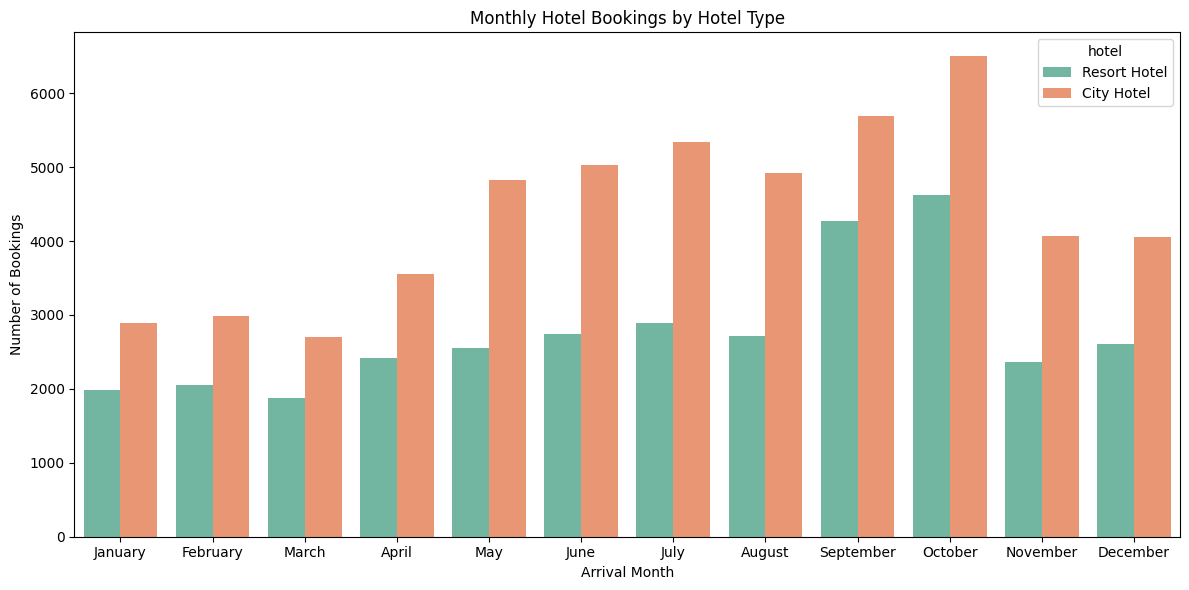

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_hotel['arrival_date_month'] = pd.Categorical(df_hotel['arrival_date_month'], categories=month_order, ordered=True)

plt.figure(figsize=(12,6))
sns.countplot(
    data=df_hotel,
    x='arrival_date_month',
    hue='hotel',
    palette='Set2'
)
plt.title('Monthly Hotel Bookings by Hotel Type')
plt.xlabel('Arrival Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#feature encoding
# Define mappings for each categorical column
meal_mapping = {'No Meal': 1, 'Breakfast': 2, 'Dinner': 3, 'Full Board': 4}

# To ensure accuracy, let's get the current unique values for market_segment and distribution_channel
# after the previous 'Undefined' replacement.
# Display current unique values for market_segment and distribution_channel to confirm mappings
print(f"Current unique values for 'market_segment': {df_hotel['market_segment'].unique()}")
print(f"Current unique values for 'distribution_channel': {df_hotel['distribution_channel'].unique()}")

# Based on previous replacement: 'Undefined' was replaced with 'no_market' and 'no_channel'
market_segment_mapping = {'Direct': 1, 'Corporate': 2, 'Online TA': 3, 'Offline TA/TO': 4,
                          'Complementary': 5, 'Groups': 6, 'no_market': 7, 'Aviation': 8}
distribution_channel_mapping = {'Direct': 1, 'Corporate': 2, 'TA/TO': 3, 'no_channel': 4, 'GDS': 5}
deposit_type_mapping = {'No Deposit': 1, 'Refundable': 2, 'Non Refund': 3}
customer_type_mapping = {'Personal': 1, 'Contract': 2, 'Family': 3, 'Bussiness': 4}
reservation_status_mapping = {'Check-Out': 1, 'Canceled': 2, 'No-Show': 3}

# Apply the mappings to the DataFrame
df_hotel['meal'] = df_hotel['meal'].map(meal_mapping)
df_hotel['market_segment'] = df_hotel['market_segment'].map(market_segment_mapping)
df_hotel['distribution_channel'] = df_hotel['distribution_channel'].map(distribution_channel_mapping)
df_hotel['deposit_type'] = df_hotel['deposit_type'].map(deposit_type_mapping)
df_hotel['customer_type'] = df_hotel['customer_type'].map(customer_type_mapping)
df_hotel['reservation_status'] = df_hotel['reservation_status'].map(reservation_status_mapping)

print("\nData types after encoding:")
df_hotel.info()

Current unique values for 'market_segment': ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Aviation']
Current unique values for 'distribution_channel': ['Direct' 'Corporate' 'TA/TO' 'no_channel' 'GDS']

Data types after encoding:
<class 'pandas.core.frame.DataFrame'>
Index: 85675 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           85675 non-null  object        
 1   is_canceled                     85675 non-null  int64         
 2   lead_time                       85675 non-null  int64         
 3   arrival_date_year               85675 non-null  int64         
 4   arrival_date_month              85675 non-null  category      
 5   arrival_date_week_number        85675 non-null  int64         
 6   arrival_date_day_of_month       85675 non-null  int64         
 7   stays_in_weekend_n

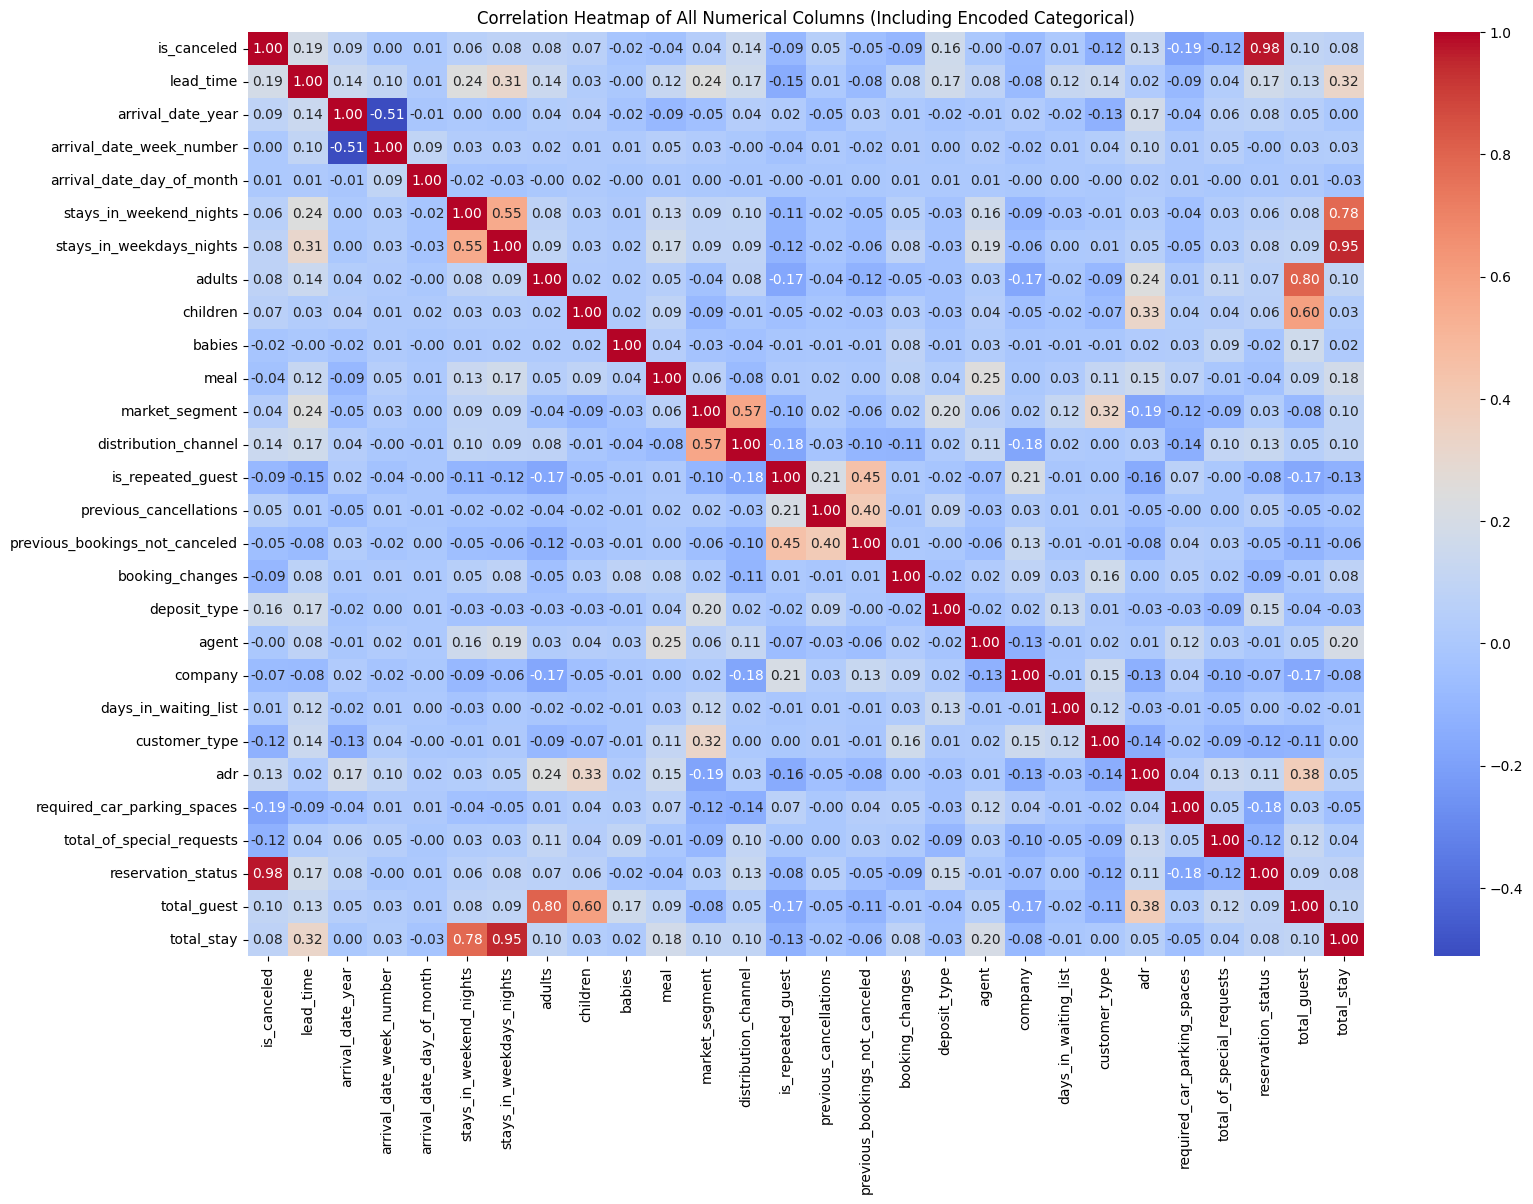

In [ ]:
# Re-group numerical columns after encoding categorical features
num_updated = df_hotel.select_dtypes(include='number').columns

plt.figure(figsize=(18,12))
sns.heatmap(df_hotel[num_updated].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of All Numerical Columns (Including Encoded Categorical)')
plt.show()

In [ ]:
import numpy as np

# Define the target variable
target = 'is_canceled'

# Define columns to exclude from features, based on user request
# Note: 'year', 'month', 'adult' are mapped to their actual column names
exclude_features = [
    'date',
    'arrival_date_year',
    'arrival_date_week_number',
    'arrival_date_day_of_month',
    'arrival_date_month',
    'total_guest',
    'total_stay',
    'reservation_status', # Excluded as it's highly correlated with the target
    'city',
    'babies',
    'children',
    'adults'
]

# Create the feature DataFrame by dropping the excluded columns
df_features = df_hotel.drop(columns=exclude_features, errors='ignore')

# Display the head of the new DataFrame and its shape to confirm
print("Shape of the new feature DataFrame:", df_features.shape)
print("\nFirst 5 rows of the feature DataFrame:")
display(df_features.head())


Shape of the new feature DataFrame: (85675, 20)

First 5 rows of the feature DataFrame:


,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_weekdays_nights,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,0,0,2,1,1,0,0,0,3,1,0.0,0.0,0,1,0.0,0,0
1,Resort Hotel,0,737,0,0,2,1,1,0,0,0,4,1,0.0,0.0,0,1,0.0,0,0
2,Resort Hotel,0,7,0,1,2,1,1,0,0,0,0,1,0.0,0.0,0,1,75.0,0,0
3,Resort Hotel,0,13,0,1,2,2,2,0,0,0,0,1,304.0,0.0,0,1,75.0,0,0
4,Resort Hotel,0,14,0,2,2,3,3,0,0,0,0,1,240.0,0.0,0,1,98.0,0,1


In [ ]:
y = df_features[target]
X = df_features.drop(columns=[target])

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:")
display(X.head())
print("First 5 rows of y:")
display(y.head())

Shape of X: (85675, 19)
Shape of y: (85675,)
First 5 rows of X:


,hotel,lead_time,stays_in_weekend_nights,stays_in_weekdays_nights,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,342,0,0,2,1,1,0,0,0,3,1,0.0,0.0,0,1,0.0,0,0
1,Resort Hotel,737,0,0,2,1,1,0,0,0,4,1,0.0,0.0,0,1,0.0,0,0
2,Resort Hotel,7,0,1,2,1,1,0,0,0,0,1,0.0,0.0,0,1,75.0,0,0
3,Resort Hotel,13,0,1,2,2,2,0,0,0,0,1,304.0,0.0,0,1,75.0,0,0
4,Resort Hotel,14,0,2,2,3,3,0,0,0,0,1,240.0,0.0,0,1,98.0,0,1


First 5 rows of y:


,is_canceled
0,0
1,0
2,0
3,0
4,0


In [ ]:
X = pd.get_dummies(X, columns=['hotel'], drop_first=True)

print("Shape of X after one-hot encoding:", X.shape)
print("First 5 rows of X after one-hot encoding:")
display(X.head())

Shape of X after one-hot encoding: (85675, 19)
First 5 rows of X after one-hot encoding:


,lead_time,stays_in_weekend_nights,stays_in_weekdays_nights,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,hotel_Resort Hotel
0,342,0,0,2,1,1,0,0,0,3,1,0.0,0.0,0,1,0.0,0,0,True
1,737,0,0,2,1,1,0,0,0,4,1,0.0,0.0,0,1,0.0,0,0,True
2,7,0,1,2,1,1,0,0,0,0,1,0.0,0.0,0,1,75.0,0,0,True
3,13,0,1,2,2,2,0,0,0,0,1,304.0,0.0,0,1,75.0,0,0,True
4,14,0,2,2,3,3,0,0,0,0,1,240.0,0.0,0,1,98.0,0,1,True


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nFirst 5 rows of X_train:")
display(X_train.head())


Shape of X_train: (68540, 19)
Shape of X_test: (17135, 19)
Shape of y_train: (68540,)
Shape of y_test: (17135,)

First 5 rows of X_train:


,lead_time,stays_in_weekend_nights,stays_in_weekdays_nights,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,hotel_Resort Hotel
45800,98,1,2,2,6,3,0,0,0,0,1,37.0,0.0,0,3,70.00,0,0,False
43086,20,1,3,2,3,3,0,0,0,0,1,9.0,0.0,0,2,105.00,0,2,False
32911,15,1,2,4,3,3,0,0,0,0,1,467.0,0.0,0,1,58.40,0,0,True
92150,89,2,3,2,3,3,0,0,0,0,1,9.0,0.0,0,1,107.10,0,2,False
78468,18,2,4,2,3,3,0,0,0,0,1,11.0,0.0,0,1,81.35,0,0,False


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

print("RandomForestClassifier model trained successfully.")

RandomForestClassifier model trained successfully.


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation on Test Set:
Accuracy: 0.8014590020426029

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     12426
           1       0.67      0.54      0.60      4709

    accuracy                           0.80     17135
   macro avg       0.76      0.72      0.73     17135
weighted avg       0.79      0.80      0.79     17135



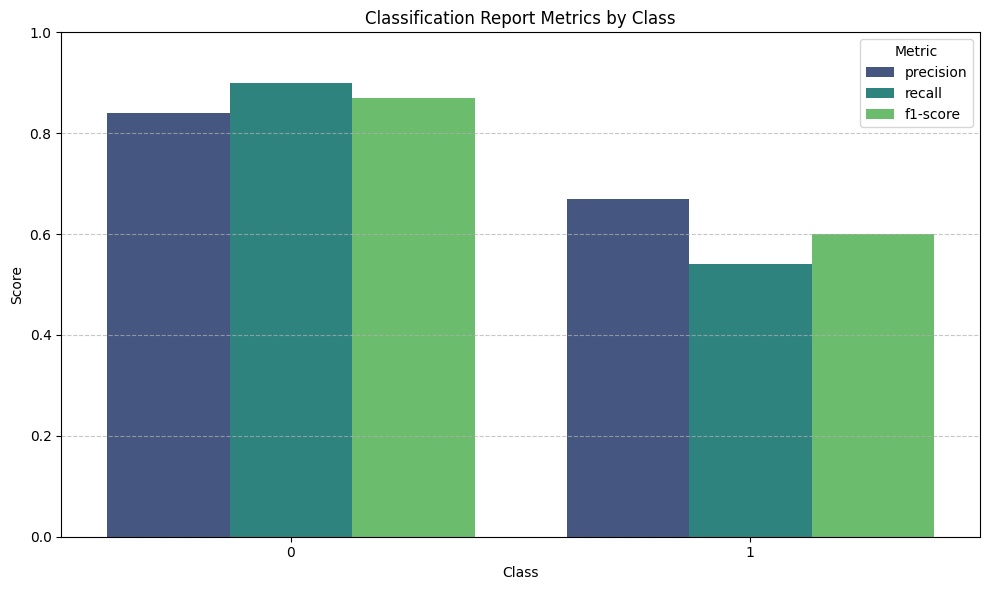

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the classification report provided by the user
report_data = {
    'class': ['0', '1'],
    'precision': [0.84, 0.67],
    'recall': [0.90, 0.54],
    'f1-score': [0.87, 0.60],
    'support': [12426, 4709]
}
df_report = pd.DataFrame(report_data)

# Melt the DataFrame to prepare for seaborn bar plot
df_melted = df_report.melt(id_vars='class', var_name='metric', value_vars=['precision', 'recall', 'f1-score'],
                           value_name='score')

plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='score', hue='metric', data=df_melted, palette='viridis')
plt.title('Classification Report Metrics by Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0, 1) # Scores are between 0 and 1
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

print("Feature Importances (Top 10):")
display(features_df.head(10))

Feature Importances (Top 10):


,Feature,Importance
0,lead_time,0.286706
15,adr,0.247772
11,agent,0.073483
2,stays_in_weekdays_nights,0.070897
17,total_of_special_requests,0.057668
4,market_segment,0.039916
1,stays_in_weekend_nights,0.038504
16,required_car_parking_spaces,0.032043
14,customer_type,0.025449
7,previous_cancellations,0.023210


Feature Importances (Top 10):


,Feature,Importance
0,lead_time,0.286706
15,adr,0.247772
11,agent,0.073483
2,stays_in_weekdays_nights,0.070897
17,total_of_special_requests,0.057668
4,market_segment,0.039916
1,stays_in_weekend_nights,0.038504
16,required_car_parking_spaces,0.032043
14,customer_type,0.025449
7,previous_cancellations,0.023210


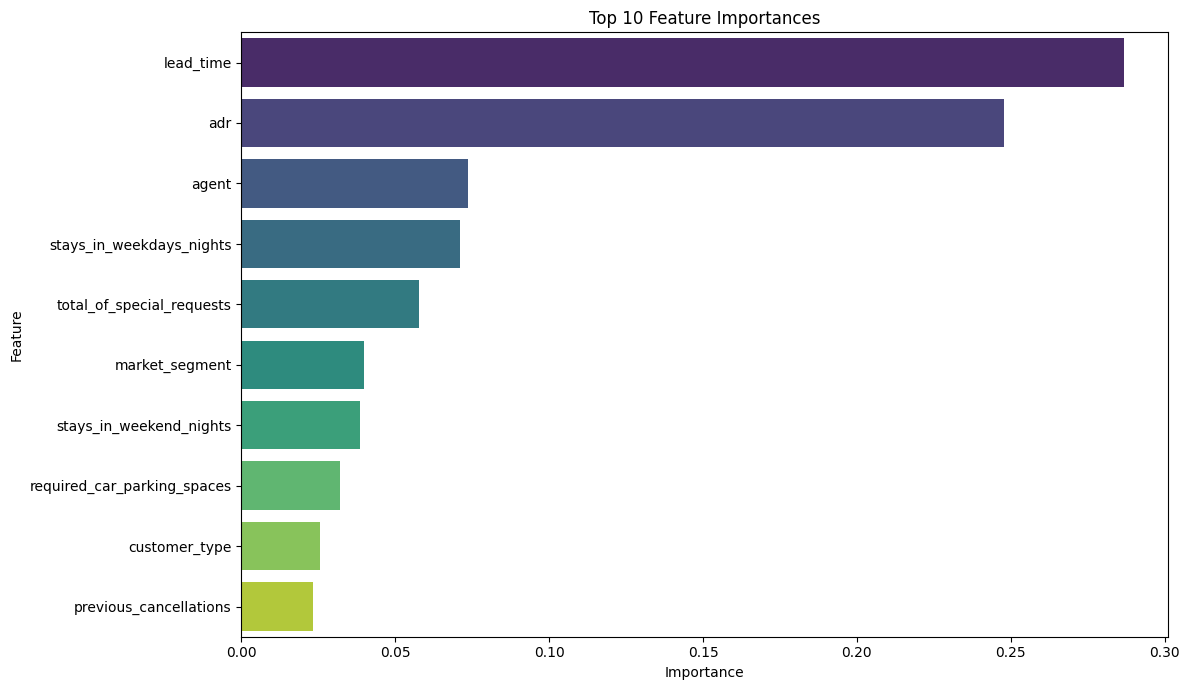

In [ ]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

print("Feature Importances (Top 10):")
display(features_df.head(10))

# Visualize feature importances
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette='viridis', hue='Feature', legend=False)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings
*   The target variable `is_canceled` was successfully separated, and the `hotel` column was one-hot encoded, resulting in a new feature `hotel_Resort Hotel`.
*   The dataset was split into training and testing sets, with 80% for training (68,540 samples) and 20% for testing (17,135 samples).
*   A RandomForestClassifier model was trained and achieved an accuracy of approximately 80.15% on the test set.
*   The model demonstrated good performance in predicting non-cancellations (class 0) with a precision of 0.84 and a recall of 0.90. However, its performance for predicting cancellations (class 1) was lower, with a precision of 0.67 and a recall of 0.54.
*   The top three most important features influencing the model's predictions were `lead_time` (0.2867), `adr` (average daily rate) (0.2478), and `agent` (0.0735).

### Insights or Next Steps
*   The model's lower recall for cancellations (class 1) suggests that while it is good at identifying non-cancellations, it misses about half of the actual cancellations. This could be addressed by exploring techniques to handle imbalanced classes (if the cancellation rate is low) or by engineering new features that better capture the cancellation behavior.
*   Given that `lead_time`, `adr`, and `agent` are the most influential features, further analysis could focus on the relationship between these variables and cancellation rates to develop targeted strategies. For example, investigating specific `lead_time` or `adr` ranges that are more prone to cancellations, or evaluating the performance of different agents.


In [ ]:
target = 'is_repeated_guest'
print(f"New target variable: {target}")

New target variable: is_repeated_guest


In [ ]:
y = df_hotel[target]

# Define columns to exclude from features, based on user request
exclude_features = [
    target, # The target variable 'is_canceled' itself must be excluded from features
    'date',
    'arrival_date_year',
    'arrival_date_week_number',
    'arrival_date_day_of_month',
    'arrival_date_month',
    'total_guest',
    'total_stay',
    'city',
    'babies',
    'children',
    'adults',
    'hotel',
    'previous_bookings_not_canceled'
]

# Create feature DataFrame by dropping the specified columns
X = df_hotel.drop(columns=exclude_features, errors='ignore')

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("\nFirst 5 rows of X:")
display(X.head())
print("\nFirst 5 rows of y:")
display(y.head())

Shape of X: (85675, 18)
Shape of y: (85675,)

First 5 rows of X:


,is_canceled,lead_time,stays_in_weekend_nights,stays_in_weekdays_nights,meal,market_segment,distribution_channel,previous_cancellations,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,0,342,0,0,2,1,1,0,3,1,0.0,0.0,0,1,0.0,0,0,1
1,0,737,0,0,2,1,1,0,4,1,0.0,0.0,0,1,0.0,0,0,1
2,0,7,0,1,2,1,1,0,0,1,0.0,0.0,0,1,75.0,0,0,1
3,0,13,0,1,2,2,2,0,0,1,304.0,0.0,0,1,75.0,0,0,1
4,0,14,0,2,2,3,3,0,0,1,240.0,0.0,0,1,98.0,0,1,1



First 5 rows of y:


,is_repeated_guest
0,0
1,0
2,0
3,0
4,0


In [ ]:
#X = pd.get_dummies(X, columns=['hotel'], drop_first=True)

#print("Shape of X after one-hot encoding 'hotel':", X.shape)
#print("First 5 rows of X after one-hot encoding 'hotel':")
#display(X.head())

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nFirst 5 rows of X_train:")
display(X_train.head())

Shape of X_train: (68540, 18)
Shape of X_test: (17135, 18)
Shape of y_train: (68540,)
Shape of y_test: (17135,)

First 5 rows of X_train:


,is_canceled,lead_time,stays_in_weekend_nights,stays_in_weekdays_nights,meal,market_segment,distribution_channel,previous_cancellations,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
45800,1,98,1,2,2,6,3,0,0,1,37.0,0.0,0,3,70.00,0,0,3
43086,0,20,1,3,2,3,3,0,0,1,9.0,0.0,0,2,105.00,0,2,1
32911,0,15,1,2,4,3,3,0,0,1,467.0,0.0,0,1,58.40,0,0,1
92150,0,89,2,3,2,3,3,0,0,1,9.0,0.0,0,1,107.10,0,2,1
78468,0,18,2,4,2,3,3,0,0,1,11.0,0.0,0,1,81.35,0,0,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

print("RandomForestClassifier model trained successfully.")

RandomForestClassifier model trained successfully.


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation on Test Set:
Accuracy: 0.9715786402100963

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     16453
           1       0.70      0.50      0.58       682

    accuracy                           0.97     17135
   macro avg       0.84      0.74      0.78     17135
weighted avg       0.97      0.97      0.97     17135



In [ ]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

#print("Feature Importances (Top 10):")
display(features_df.head(10))

,Feature,Importance
14,adr,0.207675
1,lead_time,0.155411
11,company,0.130988
10,agent,0.077676
7,previous_cancellations,0.064461
3,stays_in_weekdays_nights,0.060878
16,total_of_special_requests,0.051652
5,market_segment,0.050926
6,distribution_channel,0.041203
13,customer_type,0.039659
